In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from functions import torch2np_u8
from data_manager import rgbd_gradients_dataset, rgbd_gradients_dataloader, rgbd_gradients_inference_dataset
from hyperparameters import IMAGE_SIZE, BATCH_SIZE, NUM_WORKERS, TRAIN_TEST_RATIO
from gradients_to_navigation import Gradients_to_navigation
# %matplotlib notebook

In [2]:
CWD             = os.getcwd()
DATASET_DIR     = os.path.join(CWD,'data/nyuv2')
print(f'[I] - DATASET_DIR={DATASET_DIR}')
print(f'[I] - IMAGE_SIZE={IMAGE_SIZE}')
if BATCH_SIZE > 1:
    BATCH_SIZE = 1
print(f'[I] - BATCH_SIZE={BATCH_SIZE}')
print(f'[I] - NUM_WORKERS={NUM_WORKERS}')
print(f'[I] - TRAIN_TEST_RATIO={TRAIN_TEST_RATIO}')

[I] - DATASET_DIR=/home/manor/cs236781-DeepLearning/project/master/data/nyuv2
[I] - IMAGE_SIZE=(64, 64)
[I] - BATCH_SIZE=1
[I] - NUM_WORKERS=4
[I] - TRAIN_TEST_RATIO=0.9


In [3]:
dl_train,_ = rgbd_gradients_dataloader(DATASET_DIR, BATCH_SIZE, NUM_WORKERS, TRAIN_TEST_RATIO,
                                       IMAGE_SIZE, use_transforms=True)

[I (rgbd_gradients_dataloader)] - root=/home/manor/cs236781-DeepLearning/project/master/data/nyuv2
                                - batch_size=1
                                - num_workers=4
                                - train_test_ratio=0.9
                                - image_size=(64, 64)
                                - use_transforms=True
                                - overfit_mode=False
                                - seed=42
                                - inference=None
                                - goto_pixel=True

[I (rgbd_gradients_dataset)] - root=/home/manor/cs236781-DeepLearning/project/master/data/nyuv2
                             - image_size=(64, 64)
                             - use_transforms=True
                             - overfit_mode=False
                             - goto_pixel=True

[I] - |self|=1278
[I (rgbd_gradients_dataloader)] - |Train Dataset|=1151, |Test Dataset|=127


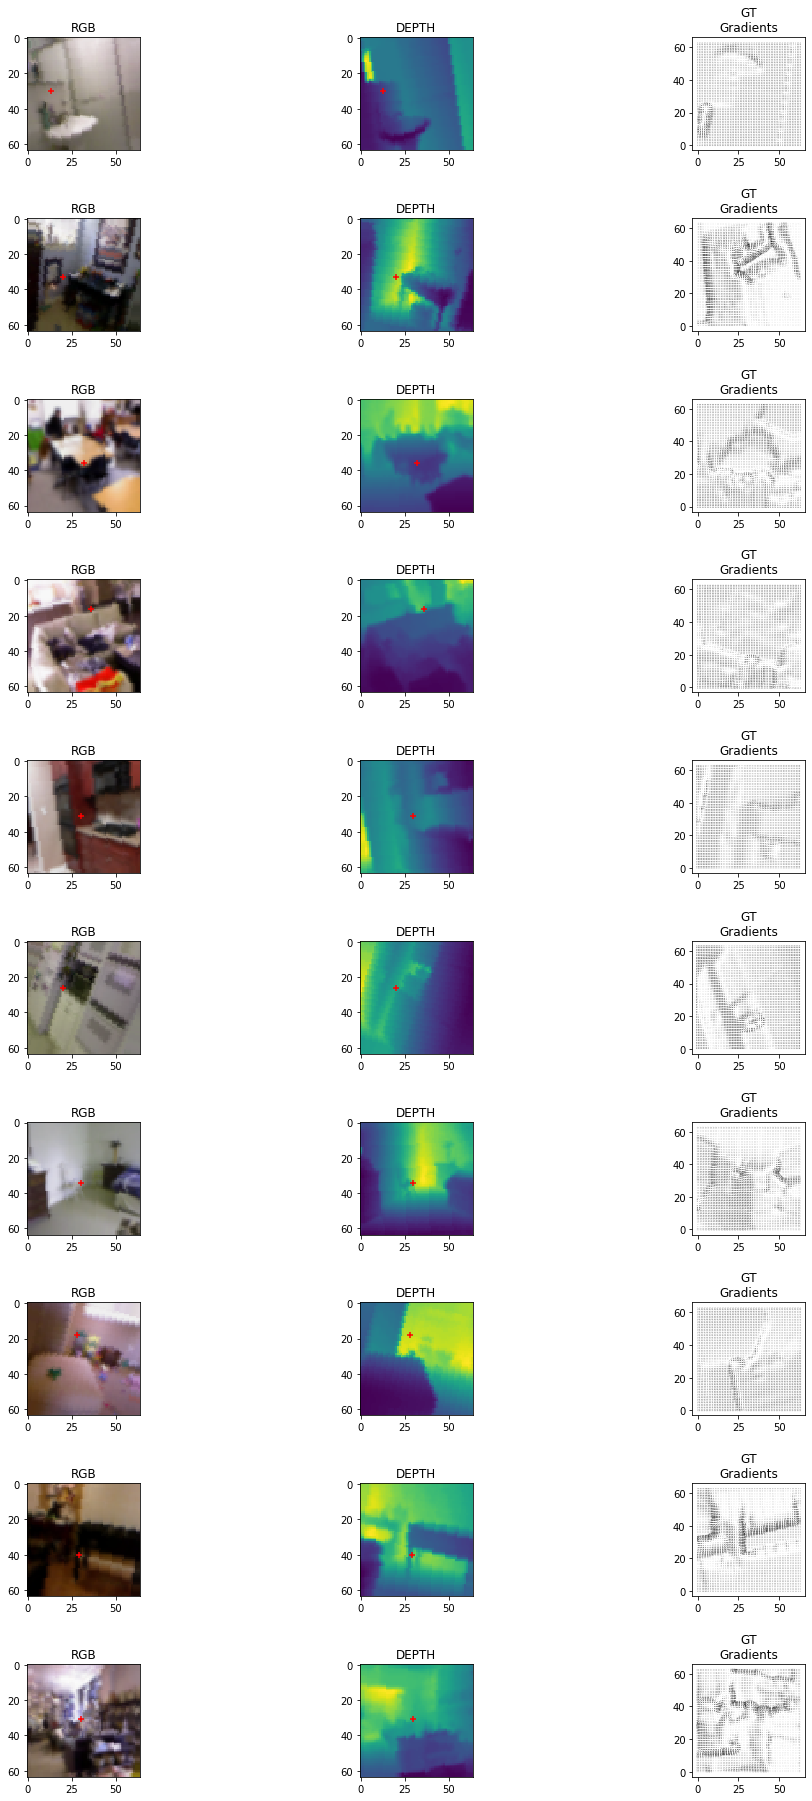

In [4]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(32,32), subplot_kw={'aspect': 1},
                         gridspec_kw=dict(wspace=0.3, hspace=0.6, left=0.1, right=0.5))

for i, sample in enumerate(dl_train):
    if i >=10:
        break
    rgb        = sample['rgb']
    depth      = sample['depth']
    x_gt       = sample['x']
    y_gt       = sample['y']
    goto_pixel = sample['goto_pixel']
    goto_x = goto_pixel[0,0].numpy()
    goto_y = goto_pixel[0,1].numpy()
    rgb_size   = tuple(rgb.shape[1:])
    depth_size = tuple(depth.shape[1:])
    grads_size = tuple(x_gt.shape[1:])
    x_gt       = x_gt.squeeze()
    y_gt       = y_gt.squeeze()
    rgb_im     = torch2np_u8(rgb)
    depth_im   = torch2np_u8(depth)

    axes[i,0].imshow(rgb_im)
    axes[i,0].set_title('RGB')
    axes[i,0].scatter(x=goto_x, y=goto_y, c='r', marker='+')
    axes[i,1].imshow(depth_im)
    axes[i,1].set_title('DEPTH')
    axes[i,1].scatter(x=goto_x, y=goto_y, c='r', marker='+')
    X_gt,Y_gt = np.meshgrid(np.arange(x_gt.shape[1]), np.arange(x_gt.shape[0]))
    axes[i,2].quiver(X_gt, Y_gt, x_gt, y_gt, pivot='tip', units='xy')
    axes[i,2].set_title('GT\nGradients')
plt.show()

In [5]:
dl_train,_ = rgbd_gradients_dataloader(DATASET_DIR, BATCH_SIZE, NUM_WORKERS, TRAIN_TEST_RATIO,
                                       IMAGE_SIZE, use_transforms=True,
                                       inference='zero_depth')

[I (rgbd_gradients_dataloader)] - root=/home/manor/cs236781-DeepLearning/project/master/data/nyuv2
                                - batch_size=1
                                - num_workers=4
                                - train_test_ratio=0.9
                                - image_size=(64, 64)
                                - use_transforms=True
                                - overfit_mode=False
                                - seed=42
                                - inference=zero_depth
                                - goto_pixel=True

[I (rgbd_gradients_inference_dataset)] - root=/home/manor/cs236781-DeepLearning/project/master/data/nyuv2
                                       - image_size=(64, 64)
                                       - inference=zero_depth
                                       - goto_pixel=True

[I] - |self|=1278
[I (rgbd_gradients_dataloader)] - |Train Dataset|=1151, |Test Dataset|=127


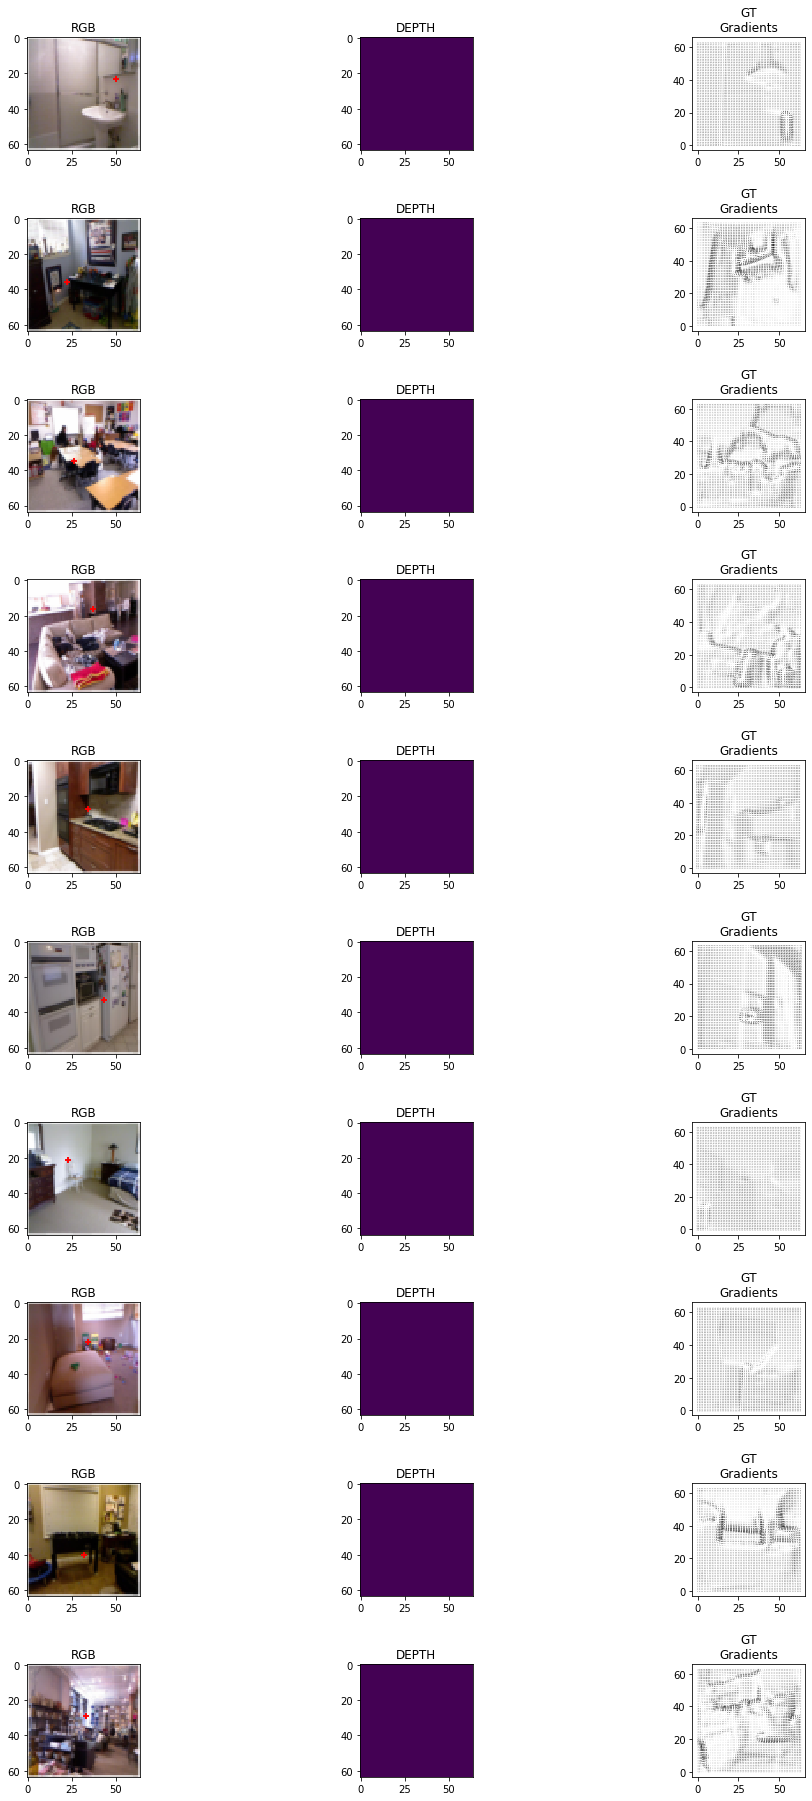

In [6]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(32,32), subplot_kw={'aspect': 1},
                         gridspec_kw=dict(wspace=0.3, hspace=0.6, left=0.1, right=0.5))

for i, sample in enumerate(dl_train):
    if i >=10:
        break
    rgb        = sample['rgb']
    depth      = sample['depth']
    x_gt       = sample['x']
    y_gt       = sample['y']
    goto_pixel = sample['goto_pixel']
    goto_x = goto_pixel[0,0].numpy()
    goto_y = goto_pixel[0,1].numpy()
    rgb_size   = tuple(rgb.shape[1:])
    depth_size = tuple(depth.shape[1:])
    grads_size = tuple(x_gt.shape[1:])
    x_gt       = x_gt.squeeze()
    y_gt       = y_gt.squeeze()
    rgb_im     = torch2np_u8(rgb)
    depth_im   = torch2np_u8(depth)

    axes[i,0].imshow(rgb_im)
    axes[i,0].set_title('RGB')
    axes[i,0].scatter(x=goto_x, y=goto_y, c='r', marker='+')

    axes[i,1].imshow(depth_im)
    axes[i,1].set_title('DEPTH')
    axes[i,0].scatter(x=goto_x, y=goto_y, c='r', marker='+')

    X_gt,Y_gt = np.meshgrid(np.arange(x_gt.shape[1]), np.arange(x_gt.shape[0]))
    axes[i,2].quiver(X_gt, Y_gt, x_gt, y_gt, pivot='tip', units='xy')
    axes[i,2].set_title('GT\nGradients')
plt.show()